# ***Промежуточная диагностика***
Промежуточная диагностика реализуется в формате решения кейсов. Кейс опирается на пройдённый материал и представляет собой применение нескольких упражнений из заданий для самостоятельной работы и практических занятий.

Используя изученные на прошлых занятиях методы, проведите кластеризацию стран по показателям заболеваемости и смертности прошедшие сутки. Визуализируйте результаты. Сколько получилось кластеров? Где оказалась Россия? Сделайте выводы. Проведите аналогичный анализ для каждого из 12 предыдущих месяцев. Есть ли различие в кластерах? Если есть, то как его можно объяснить?

Критерии оценки:
* Данные выбраны и загружены правильно — 1 балл;
* Выбран и реализован правильный алгоритм кластеризации — 1 балл;
* Анализ проведен для 12 месяцев, как указано в задании — 1 балл;
* Визуализация данных выполнена правильно — 1 балл;
* Выводы по результатам проделанной кластеризации сделаны правильно — 1 балл.

Кейс считается успешно выполненным, если слушатель набрал не менее 3 из 5 возможных баллов.

In [ ]:
# устанавливаем библиотеку для работы с временными рядами
# ...
# ...устанавливается долго...
# 5 минут ждал...
!pip install tslearn==0.5.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 KB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for tslearn: filename=tslearn-0.5.1.0-cp39-cp39-linux_x86_64.whl size=863774 sha256=f62ec163f1b49786dffd8207944e1c707d441da9a94c47e8b2c19442c914cb54
  Stored in directory: /root/.cache/pip/wheels/9b/38/67/244f82e54fa62f5e47980583607e4621721c8bf25781f789ac
Successfully built tslearn


**1.** производим необходимые импорты для чтения данных, кластеризации и обучения моделей, визуализации данных.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**2.** считываем данные в датафреймы.

In [ ]:
confirmed_df = pd.read_csv('/content/drive/MyDrive/programming/МЭО/Lessons/Lesson 15/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('/content/drive/MyDrive/programming/МЭО/Lessons/Lesson 15/time_series_covid19_deaths_global.csv')

**3.** убираем лишние столбцы. Оставляем в датафреймах первые четыре столбца и значения за прошедший год

In [ ]:
confirmed_df.drop(confirmed_df.iloc[:, 4:781], inplace=True, axis=1)
deaths_df.drop(deaths_df.iloc[:, 4:781], inplace=True, axis=1)

In [ ]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,7636,7639,7640,7641,7643,7645,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,3483,3484,3485,3485,3485,3485,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,6860,6861,6861,6862,6864,6866,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,152,152,152,152,152,152,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,1900,1900,1900,1900,1900,1900,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


**4.** переходим непосредственно к анализу данных за последние сутки.

In [ ]:
# создадим функцию define_clusters для подсчёта количества кластеров. Данную функцию будем использовать и для подсчёта кластеров за месяц и за год
def define_clusters(dataframe):
  wcss = []
  for i in range(2, 11):
    ts = to_time_series_dataset(dataframe)
    model = TimeSeriesKMeans(n_clusters=i)
    model.fit(ts)
    print(i)
    plt.scatter(confirmed_df['Long'], confirmed_df['Lat'], c=model.labels_)
    plt.grid()
    plt.show()
    wcss.append(model.inertia_)
  plt.plot(range(2, 11), wcss, 'gs-')
  plt.show()

4.1 определим количество кластеров для таблиц с заболевшими и умершими

2


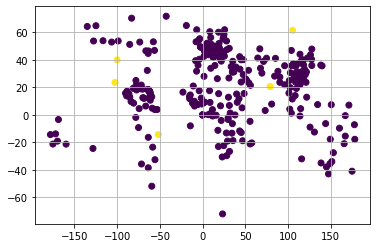

3


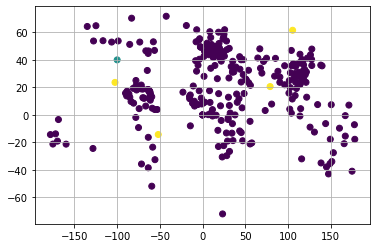

4


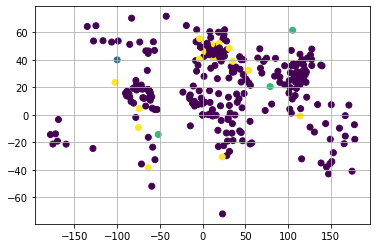

5


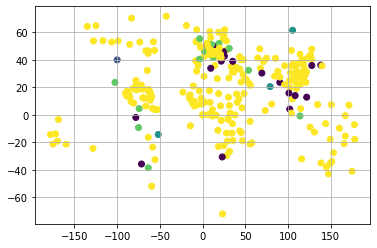

6


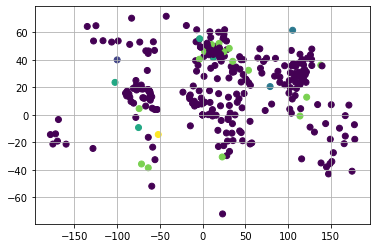

7


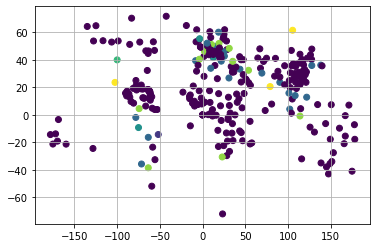

8


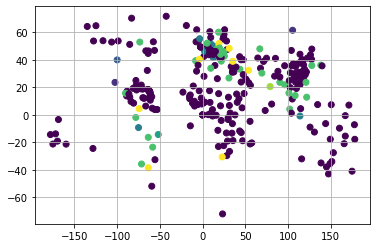

9


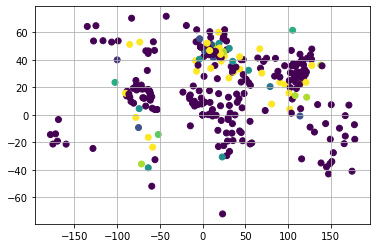

10


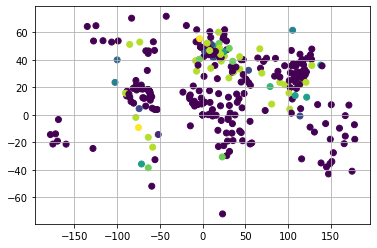

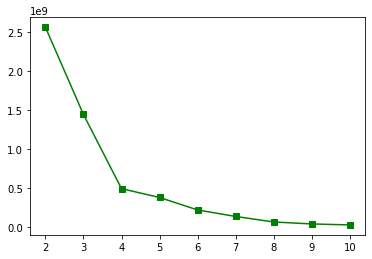

In [ ]:
define_clusters(deaths_df.iloc[:, -1:])

2


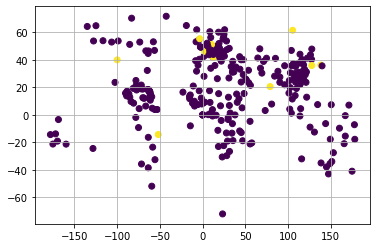

3


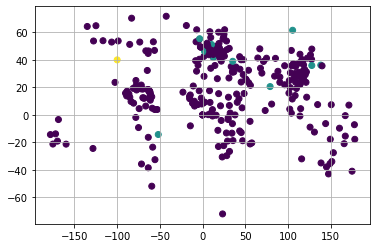

4


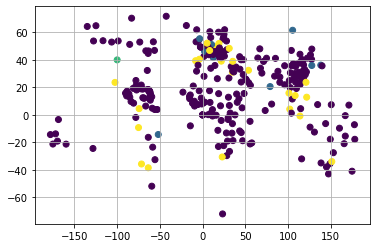

5


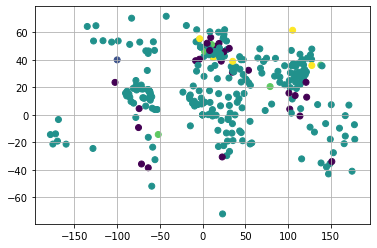

6


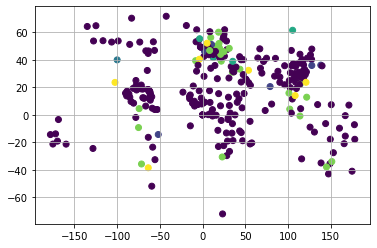

7


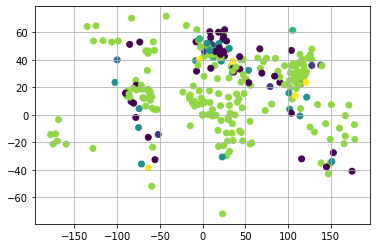

8


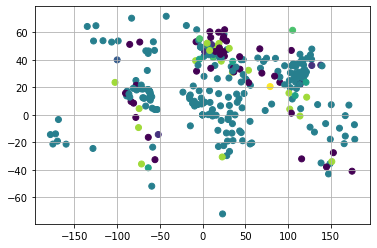

9


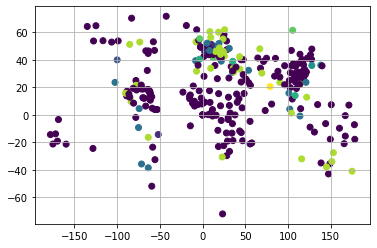

10


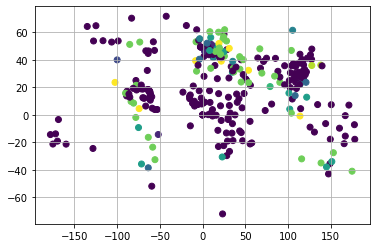

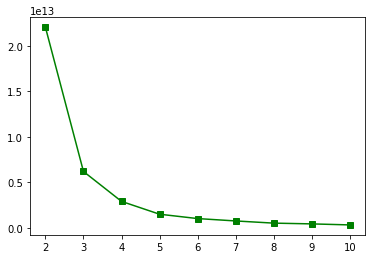

In [ ]:
define_clusters(confirmed_df.iloc[:, -1:])

4.2 получилось по четыре кластера. проведем кластеризацию и обучим модели.

In [ ]:
# проводим кластеризацию и обучение модели по заболевшим
conf_lastday =  confirmed_df.drop(confirmed_df.iloc[:, 4:-1], axis=1)
ts_confirmed = to_time_series_dataset(conf_lastday.iloc[:, -1:])
model_c = TimeSeriesKMeans(n_clusters=4)
model_c.fit(ts_confirmed)
conf_lastday['Clusters'] = model_c.predict(ts_confirmed)
conf_lastday

,Province/State,Country/Region,Lat,Long,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,209451,0
1,NaN,Albania,41.153300,20.168300,334457,0
2,NaN,Algeria,28.033900,1.659600,271496,0
3,NaN,Andorra,42.506300,1.521800,47890,0
4,NaN,Angola,-11.202700,17.873900,105288,0
...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,703228,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,535,0
286,NaN,Yemen,15.552727,48.516388,11945,0
287,NaN,Zambia,-13.133897,27.849332,343135,0


In [ ]:
# посмотрим в какой кластер попала Российская Федерация. Номер кластера каждый раз меняется.
conf_lastday[confirmed_df['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,22075858,1


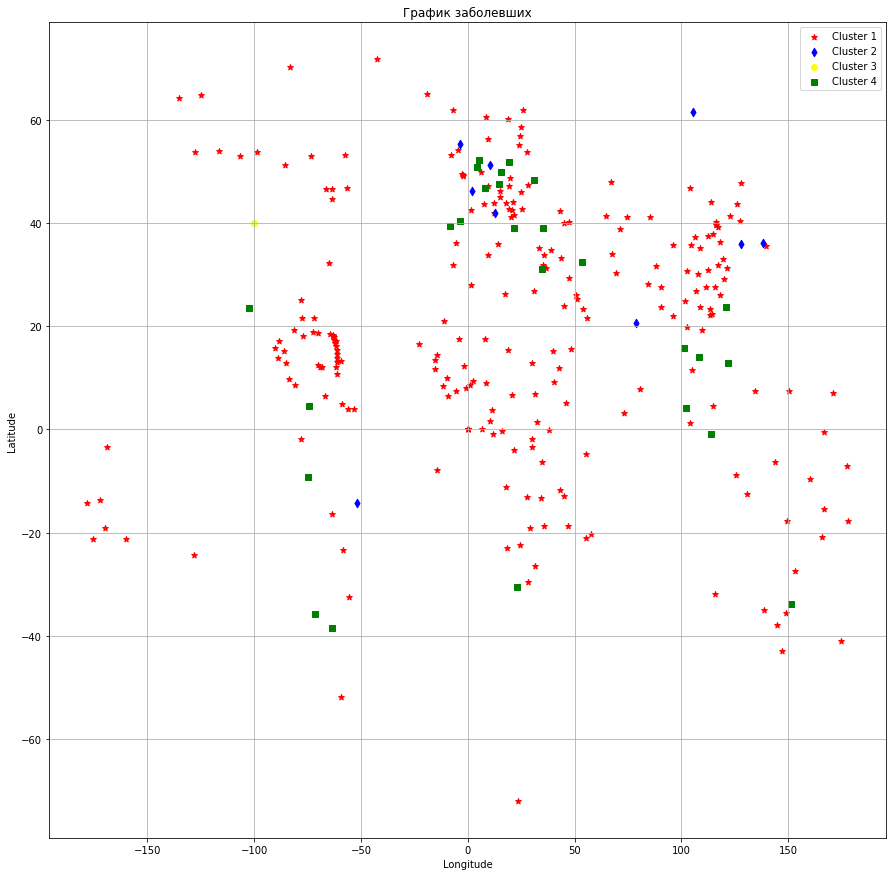

In [ ]:
# создадим переменные по одтельным кластерам и выведем точечные графики
clust1 = conf_lastday[conf_lastday['Clusters'] == 0]
clust2 = conf_lastday[conf_lastday['Clusters'] == 1]
clust3 = conf_lastday[conf_lastday['Clusters'] == 2]
clust4 = conf_lastday[conf_lastday['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График заболевших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# проводим кластеризацию и обучение модели по умершим
deaths_lastday = deaths_df.drop(deaths_df.iloc[:, 4:-1], axis=1)
ts_deaths = to_time_series_dataset(deaths_lastday.iloc[:, -1:])
model_d = TimeSeriesKMeans(n_clusters=4)
model_d.fit(ts_deaths)
deaths_lastday['Clusters'] = model_d.predict(ts_deaths)
deaths_lastday

,Province/State,Country/Region,Lat,Long,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,7896,0
1,NaN,Albania,41.153300,20.168300,3598,0
2,NaN,Algeria,28.033900,1.659600,6881,0
3,NaN,Andorra,42.506300,1.521800,165,0
4,NaN,Angola,-11.202700,17.873900,1933,0
...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,5708,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0
286,NaN,Yemen,15.552727,48.516388,2159,0
287,NaN,Zambia,-13.133897,27.849332,4057,0


In [ ]:
deaths_lastday[deaths_lastday['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,388478,1


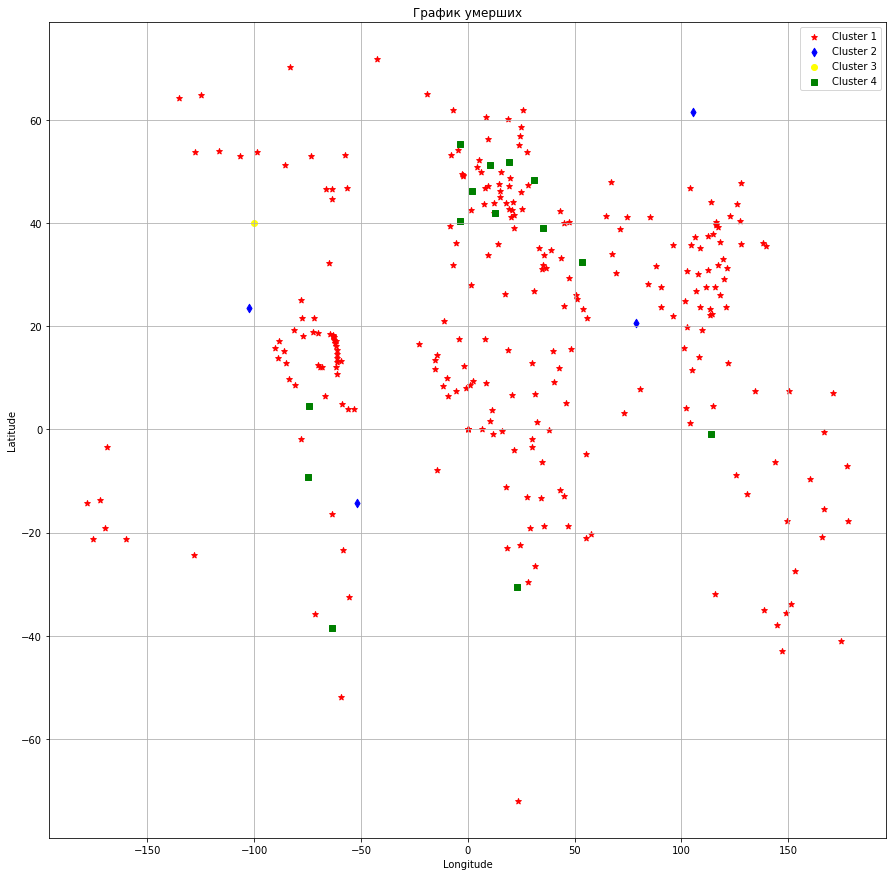

In [ ]:
clust1 = deaths_lastday[deaths_lastday['Clusters'] == 0]
clust2 = deaths_lastday[deaths_lastday['Clusters'] == 1]
clust3 = deaths_lastday[deaths_lastday['Clusters'] == 2]
clust4 = deaths_lastday[deaths_lastday['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График умерших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

**5.** проведем анализ за последний месяц

In [ ]:
# для удобства фильтрации по месяцам. т.к. датафреймы идентичны названиями столбцов, можно сделать список на основе одного
col = list(confirmed_df.columns)

2


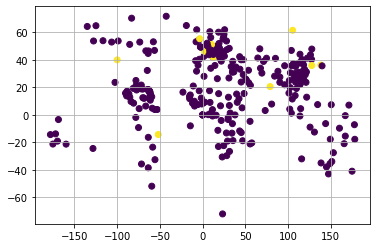

3


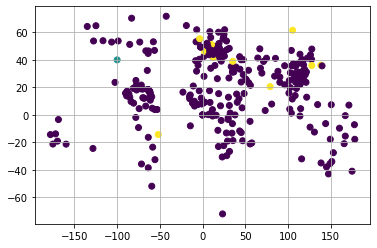

4


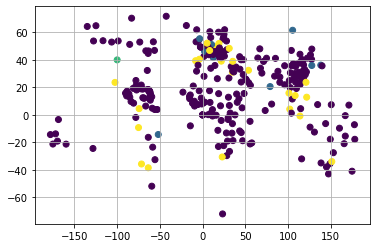

5


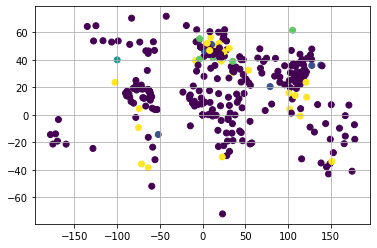

6


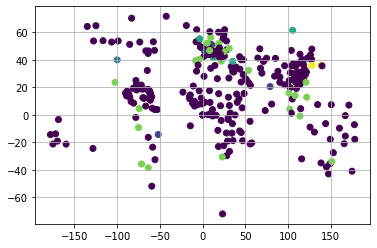

7


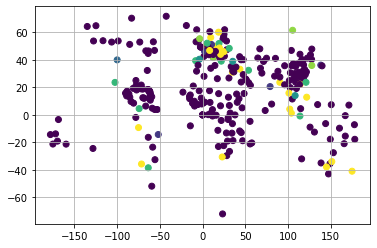

8


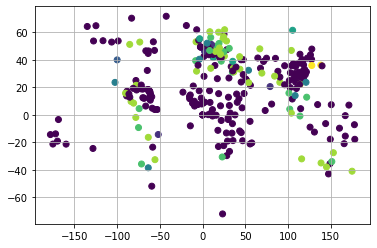

9


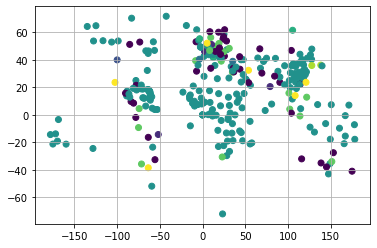

10


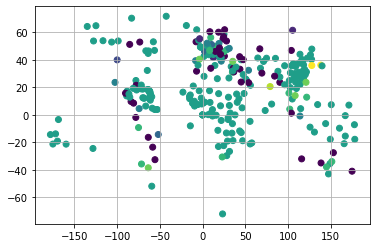

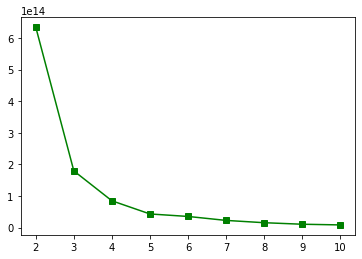

In [ ]:
define_clusters(confirmed_df.iloc[:, col.index('2/9/23'):])

2


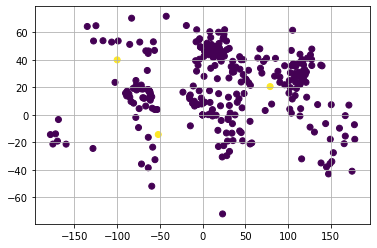

3


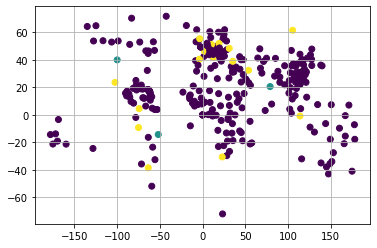

4


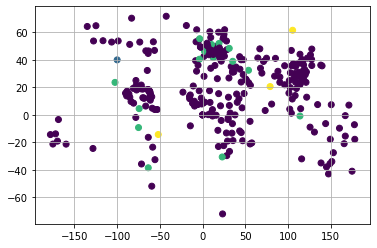

5


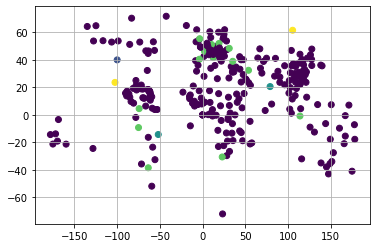

6


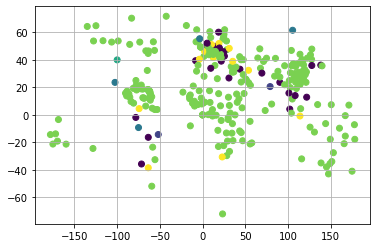

7


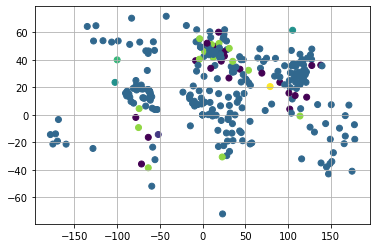

8


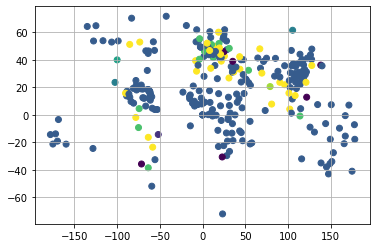

9


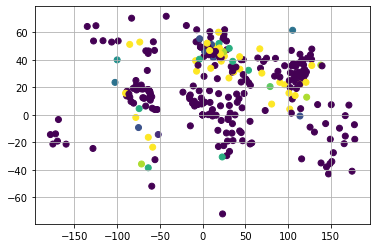

10


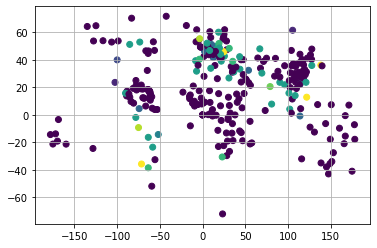

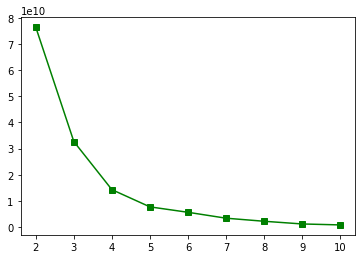

In [ ]:
define_clusters(deaths_df.iloc[:, col.index('2/9/23'):])

5.1 Возьмём как и в предыдущем примере 4 кластера

In [ ]:
conf_lastmonth = confirmed_df.drop(confirmed_df.iloc[:, 4:col.index('2/9/23')], axis=1)
ts_confirmed = to_time_series_dataset(conf_lastmonth.iloc[:, 4:])
model_c = TimeSeriesKMeans(n_clusters=4)
model_c.fit(ts_confirmed)
conf_lastmonth['Clusters'] = model_c.predict(ts_confirmed)
conf_lastmonth

,Province/State,Country/Region,Lat,Long,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,208771,208943,208971,208982,209011,209036,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,0
1,NaN,Albania,41.153300,20.168300,334229,334229,334234,334255,334255,334264,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,0
2,NaN,Algeria,28.033900,1.659600,271406,271406,271409,271409,271409,271409,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,0
3,NaN,Andorra,42.506300,1.521800,47860,47860,47860,47860,47860,47860,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,0
4,NaN,Angola,-11.202700,17.873900,105184,105184,105184,105184,105184,105184,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,703228,703228,703228,703228,703228,703228,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,535,535,535,535,535,535,...,535,535,535,535,535,535,535,535,535,0
286,NaN,Yemen,15.552727,48.516388,11945,11945,11945,11945,11945,11945,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,0
287,NaN,Zambia,-13.133897,27.849332,342114,342114,342288,342288,342317,342317,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,0


In [ ]:
conf_lastmonth[conf_lastmonth['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,21725309,21737602,21750311,21762542,21773482,21783243,...,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858,1


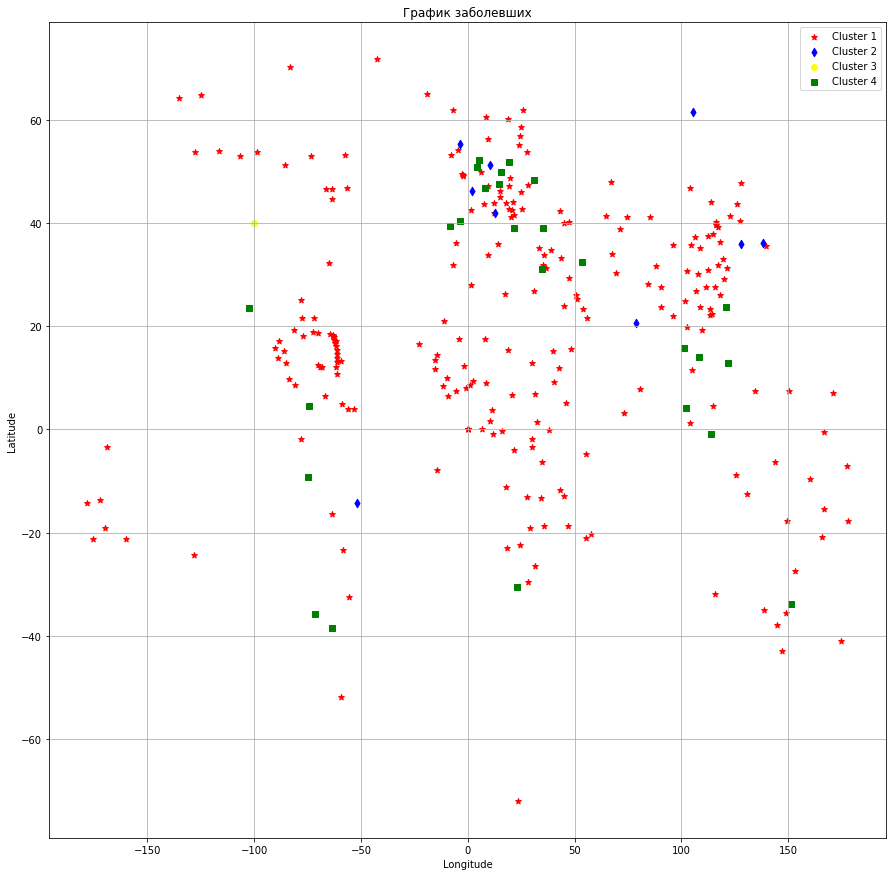

In [ ]:
clust1 = conf_lastmonth[conf_lastmonth['Clusters'] == 0]
clust2 = conf_lastmonth[conf_lastmonth['Clusters'] == 1]
clust3 = conf_lastmonth[conf_lastmonth['Clusters'] == 2]
clust4 = conf_lastmonth[conf_lastmonth['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График заболевших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
death_lastmounth = deaths_df.drop(deaths_df.iloc[:, 4:col.index('2/9/23')], axis=1)
ts_deaths = to_time_series_dataset(death_lastmounth.iloc[:, 4:])
model_d = TimeSeriesKMeans(n_clusters=4)
model_d.fit(ts_deaths)
death_lastmounth['Clusters'] = model_d.predict(ts_deaths)
death_lastmounth

,Province/State,Country/Region,Lat,Long,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,7896,7896,7896,7896,7896,7896,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,0
1,NaN,Albania,41.153300,20.168300,3596,3596,3596,3596,3596,3596,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,0
2,NaN,Algeria,28.033900,1.659600,6881,6881,6881,6881,6881,6881,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,0
3,NaN,Andorra,42.506300,1.521800,165,165,165,165,165,165,...,165,165,165,165,165,165,165,165,165,0
4,NaN,Angola,-11.202700,17.873900,1931,1931,1931,1931,1931,1931,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,5708,5708,5708,5708,5708,5708,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,2159,2159,2159,2159,2159,2159,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,0
287,NaN,Zambia,-13.133897,27.849332,4050,4050,4051,4051,4051,4051,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,0


In [ ]:
death_lastmounth[death_lastmounth['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,2/9/23,2/10/23,2/11/23,2/12/23,2/13/23,2/14/23,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,387489,387526,387560,387590,387620,387654,...,388163,388201,388240,388278,388320,388355,388396,388440,388478,3


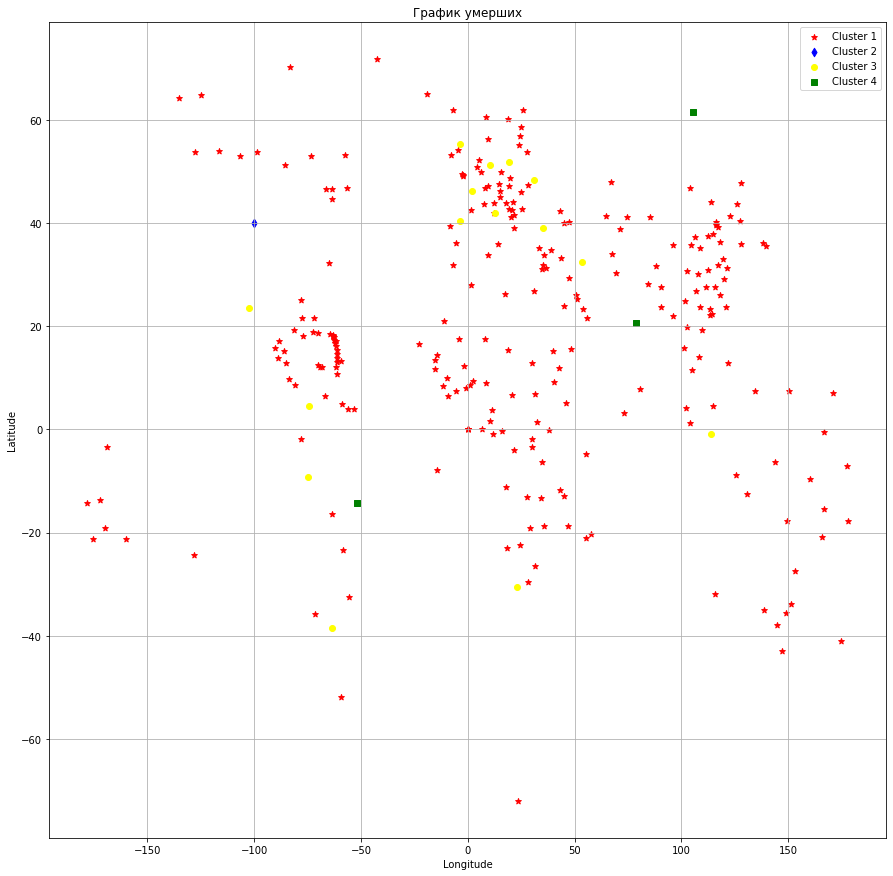

In [ ]:
clust1 = death_lastmounth[death_lastmounth['Clusters'] == 0]
clust2 = death_lastmounth[death_lastmounth['Clusters'] == 1]
clust3 = death_lastmounth[death_lastmounth['Clusters'] == 2]
clust4 = death_lastmounth[death_lastmounth['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График умерших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

**6.** проведём анализ за последний год

2


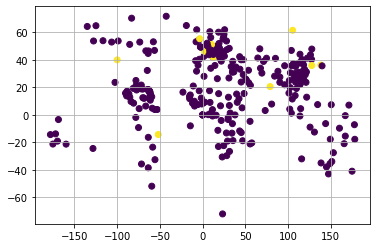

3


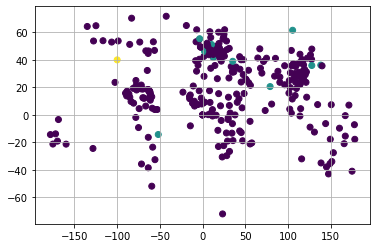

4


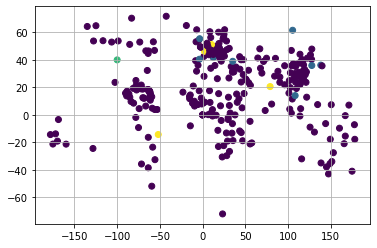

5


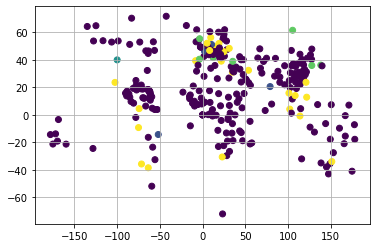

6


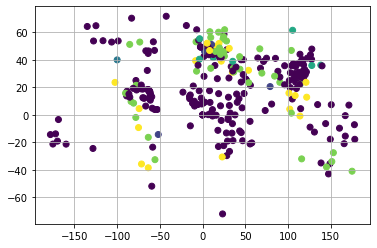

7


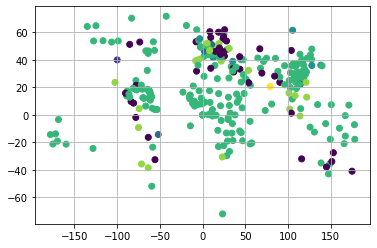

8


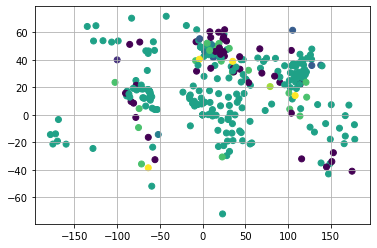

9


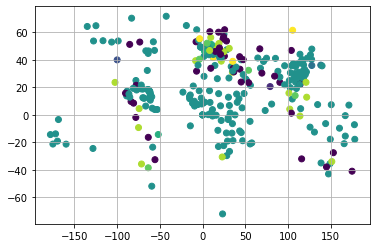

10


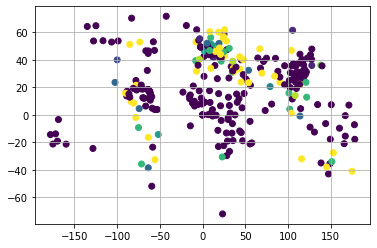

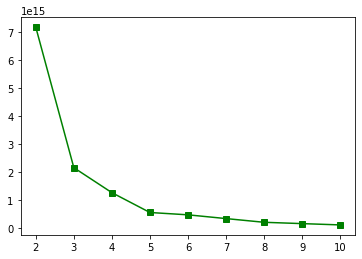

In [ ]:
define_clusters(confirmed_df.iloc[:, 4:])

2


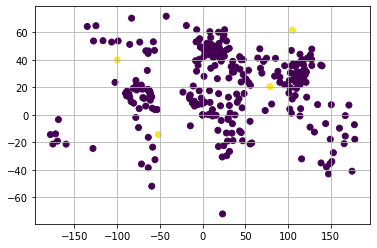

3


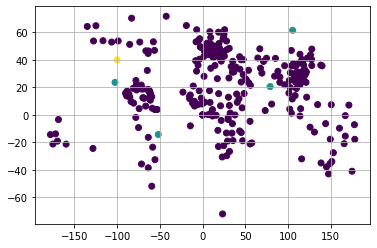

4


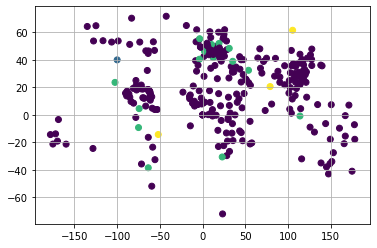

5


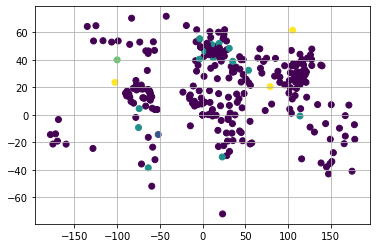

6


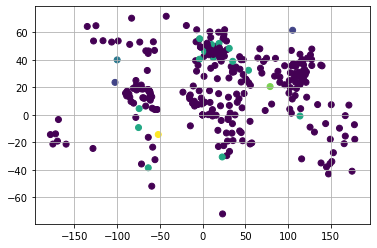

7


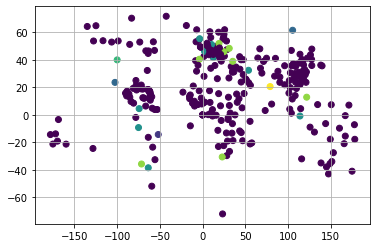

8


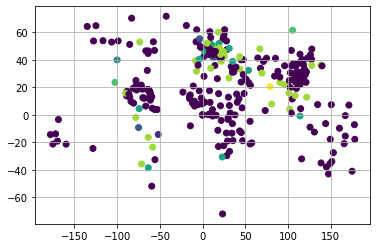

9


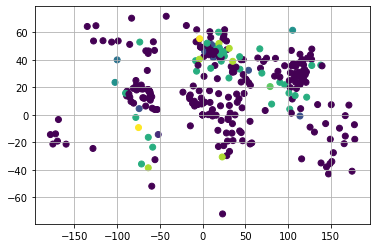

10


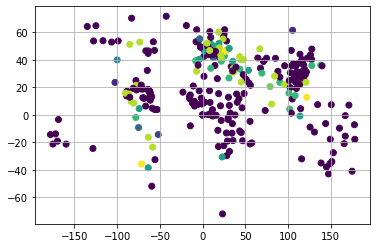

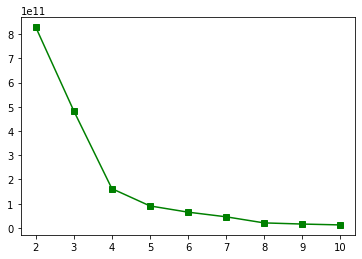

In [ ]:
define_clusters(deaths_df.iloc[:, 4:])

Возьмём так же по 4 кластера. Чтобы не вносить изменения в исходный файл, создам копии

In [ ]:
conf_lastyear = confirmed_df
ts_confirmed = to_time_series_dataset(conf_lastyear.iloc[:, 4:])
model_c = TimeSeriesKMeans(n_clusters=4)
model_c.fit(ts_confirmed)
conf_lastyear['Clusters'] = model_c.predict(ts_confirmed)
conf_lastyear

,Province/State,Country/Region,Lat,Long,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,175525,175893,175974,176039,176201,176409,...,209340,209358,209362,209369,209390,209406,209436,209451,209451,0
1,NaN,Albania,41.153300,20.168300,272412,272479,272552,272621,272663,272689,...,334408,334408,334427,334427,334427,334427,334427,334443,334457,0
2,NaN,Algeria,28.033900,1.659600,265346,265366,265391,265410,265432,265457,...,271448,271463,271469,271469,271477,271477,271490,271494,271496,0
3,NaN,Andorra,42.506300,1.521800,38794,38794,38794,38794,38794,38794,...,47875,47875,47875,47875,47875,47875,47875,47890,47890,0
4,NaN,Angola,-11.202700,17.873900,98855,98855,98855,98909,98927,98931,...,105277,105277,105277,105277,105277,105277,105277,105288,105288,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,652763,652966,653293,653293,653293,653854,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,533,535,535,535,535,535,...,535,535,535,535,535,535,535,535,535,0
286,NaN,Yemen,15.552727,48.516388,11781,11783,11783,11784,11784,11793,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,0
287,NaN,Zambia,-13.133897,27.849332,314641,314850,314986,315148,315202,315202,...,343012,343079,343079,343079,343135,343135,343135,343135,343135,0


In [ ]:
conf_lastyear[conf_lastyear['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,16893631,16943915,16993625,17040721,17084672,17124792,...,21974098,21988110,22002485,22016406,22029824,22040875,22051220,22063473,22075858,3


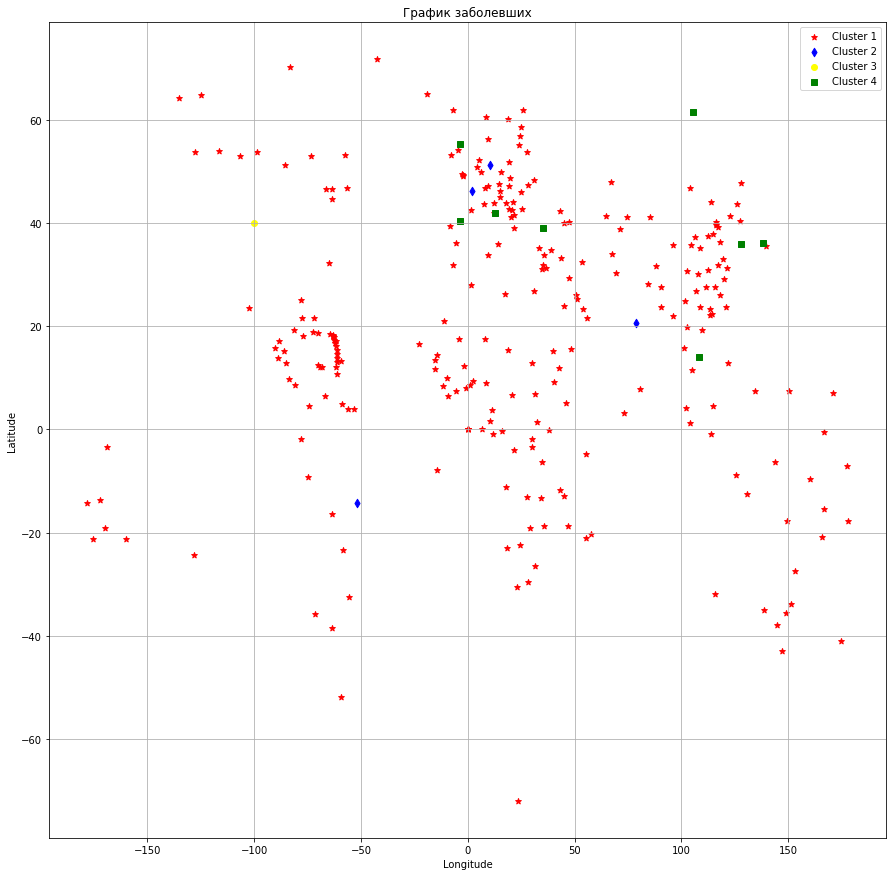

In [ ]:
clust1 = conf_lastyear[conf_lastyear['Clusters'] == 0]
clust2 = conf_lastyear[conf_lastyear['Clusters'] == 1]
clust3 = conf_lastyear[conf_lastyear['Clusters'] == 2]
clust4 = conf_lastyear[conf_lastyear['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График заболевших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

In [ ]:
deaths_lastyear = deaths_df
ts_deaths = to_time_series_dataset(deaths_lastyear.iloc[:, 4:])
model_d = TimeSeriesKMeans(n_clusters=4)
model_d.fit(ts_deaths)
deaths_lastyear['Clusters'] = model_d.predict(ts_deaths)
deaths_lastyear

,Province/State,Country/Region,Lat,Long,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
0,NaN,Afghanistan,33.939110,67.709953,7636,7639,7640,7641,7643,7645,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,0
1,NaN,Albania,41.153300,20.168300,3483,3484,3485,3485,3485,3485,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,0
2,NaN,Algeria,28.033900,1.659600,6860,6861,6861,6862,6864,6866,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,0
3,NaN,Andorra,42.506300,1.521800,152,152,152,152,152,152,...,165,165,165,165,165,165,165,165,165,0
4,NaN,Angola,-11.202700,17.873900,1900,1900,1900,1900,1900,1900,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,5588,5594,5603,5603,5603,5616,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,0
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,2138,2139,2139,2139,2139,2139,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,0
287,NaN,Zambia,-13.133897,27.849332,3960,3960,3960,3960,3960,3960,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,0


In [ ]:
deaths_lastyear[deaths_lastyear['Country/Region'] == 'Russia']

,Province/State,Country/Region,Lat,Long,3/9/22,3/10/22,3/11/22,3/12/22,3/13/22,3/14/22,...,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23,Clusters
221,NaN,Russia,61.52401,105.318756,351124,351776,352437,353054,353635,354157,...,388163,388201,388240,388278,388320,388355,388396,388440,388478,2


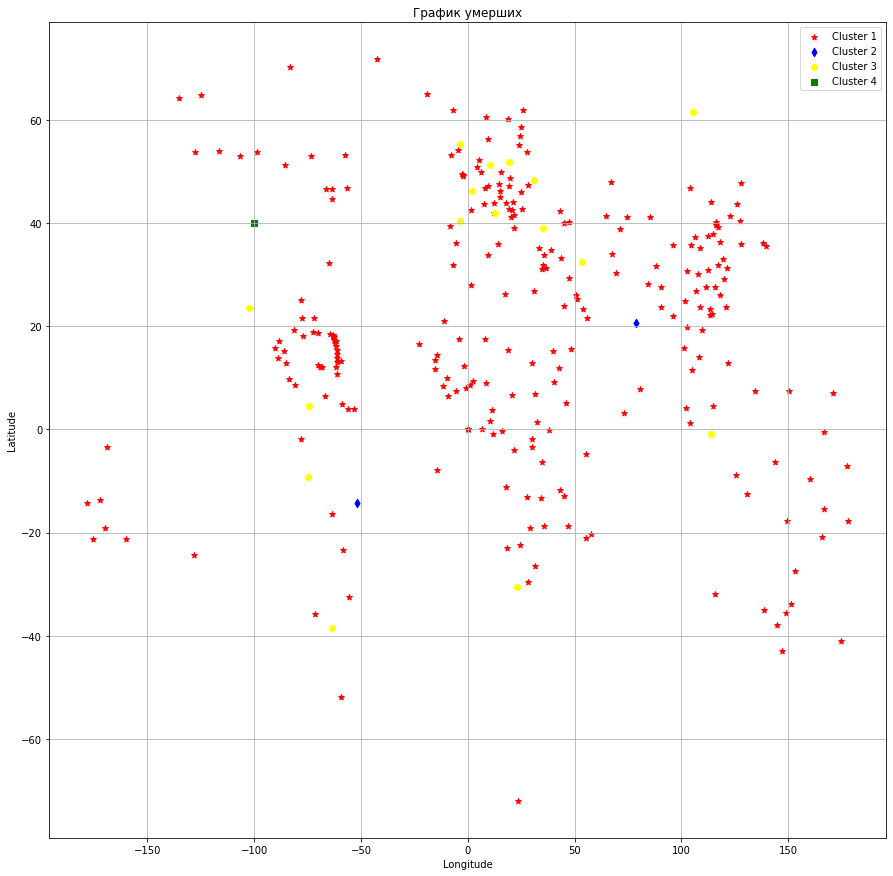

In [ ]:
clust1 = deaths_lastyear[deaths_lastyear['Clusters'] == 0]
clust2 = deaths_lastyear[deaths_lastyear['Clusters'] == 1]
clust3 = deaths_lastyear[deaths_lastyear['Clusters'] == 2]
clust4 = deaths_lastyear[deaths_lastyear['Clusters'] == 3]
plt.figure(figsize=(15, 15))
plt.scatter(clust1['Long'], clust1['Lat'], c='Red', label='Cluster 1', marker='*')
plt.scatter(clust2['Long'], clust2['Lat'], c='Blue', label='Cluster 2', marker='d')
plt.scatter(clust3['Long'], clust3['Lat'], c='Yellow', label='Cluster 3', marker='o')
plt.scatter(clust4['Long'], clust4['Lat'], c='Green', label='Cluster 4', marker='s')
plt.title('График умерших')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

# ***ВЫВОД***
Разбиение на класетры зависит от количества заболевших/умерших и динамики этих показателей. У каждой страны высчитывается среднее значение и по этим средним значениям находится центр кластеров, далее эти страны объединятся в кластеры и так до тех пор пока центры кластеров не перестанут смещаться или их смещение будет минимально. Количество кластеров находилось при помощи метода локтя, что продемонстрировано в каждом из примеров. На каждом этапе можно увидеть, что имеется один кластер в который попало от 70% до 80% всех стран (это кластер в котором наблюдается большее количество заболевших/умерших и динамика) и есть один так сказать уникальный в котором только одно значение(самое максимальное). Два оставшихся имеют до 20 значений каждый. Российская Федерация из-за относительно небольшого по сравнению со странами самого большого кластера заболеваемостью/смертностью попадает в третий по величине кластер.